# Submitted by Pratham M (2347138)

Question 2 - CNN Autoencoder for Image Reconstruction
Objective:
Develop and evaluate a Convolutional Neural Network (CNN) Autoencoder to reconstruct images
from a given dataset.
https://www.kaggle.com/datasets/codebreaker619/columbia-university-image-library
https://drive.google.com/drive/folders/1spXbIsdW3hdPD7lPnRmavi_LH0BWM6qC

Instructions:
1. Dataset:
o Use the Columbia University Object Image Library (COIL) dataset.
o Split the dataset into training (80%) and testing (20%) sets.
2. Model Development:
o Construct a CNN Autoencoder with:
▪ Encoder: Use convolutional layers with ReLU activation to reduce the input image
to a lower-dimensional latent representation.
▪ Decoder: Use transpose convolutional layers to reconstruct the image from the
latent space.

3. Training:
o Use the Mean Squared Error (MSE) loss function.
o Use Adam optimizer with a learning rate of 0.001.
o Train the model for 20 epochs with a suitable batch size.
4. Evaluation:
o Evaluate the model's performance using the testing set.
o Visualize the reconstructed images and compare them to the original images.
o Calculate and report the MSE on the test set.
5. Deliverables:
o Submit the Python code with comments explaining each step.
o Include the following outputs in the report:

1. Architecture of the CNN Autoencoder.
2. Loss curve during training.
3. Original vs. reconstructed images (at least 5 examples).
4. Final test MSE value.

Loaded 1800 images with shape (128, 128, 1)


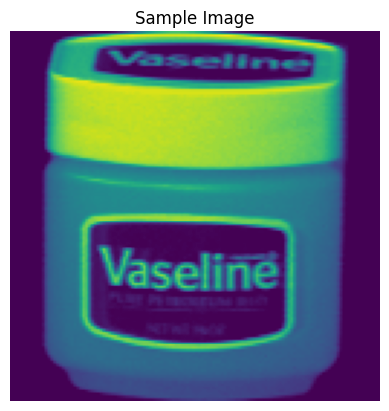

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


dataset_folder = "E:/5TH_SEM/NNDL/ETE3/coil-20"  
subdirs = [os.path.join(dataset_folder, subdir) for subdir in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, subdir))]

images = []

# Loop through each subdirectory
for subdir in subdirs:
    
    image_files = [f for f in os.listdir(subdir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for image_file in image_files:
        # Full image path
        image_path = os.path.join(subdir, image_file)
        
        try:
            img = Image.open(image_path)
            img = img.resize((128, 128))  
            
         
            img_array = img_to_array(img) / 255.0 
            
            # Append to images list
            images.append(img_array)
        except Exception as e:
            print(f"Error loading {image_file}: {e}")

# Convert the list to a NumPy array
images = np.array(images)

# Check if images were loaded
if images.shape[0] > 0:
    # Show the shape of the images
    print(f"Loaded {images.shape[0]} images with shape {images.shape[1:]}")

    # Visualize the first image
    plt.imshow(images[0])
    plt.title("Sample Image")
    plt.axis("off")
    plt.show()

    # Split the dataset into training (80%) and testing (20%) sets
    X_train, X_test = train_test_split(images, test_size=0.2, random_state=42)
else:
    print("No images loaded. Please check the folder path and file extensions.")


Loaded 1800 images with shape (128, 128, 3)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_20             │ (None, 8, 8, 256)      │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 16, 16, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_17 (UpSampling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_22             │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_18 (UpSampling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_23             │ (None, 64, 64, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_19 (UpSampling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_24             │ (None, 128, 128, 3)    │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,366,659 (5.21 MB)

 Trainable params: 1,366,659 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 0.1074 - val_loss: 0.0235
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0255 - val_loss: 0.0223
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.0200 - val_loss: 0.0142
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0135 - val_loss: 0.0109
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.0120 - val_loss: 0.0132
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - loss: 0.0116 - val_loss: 0.0095
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.0091 - val_loss: 0.0081
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.0080 - val_loss: 0.0084
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.0076 - val_loss: 0.0074
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.0070 - val_loss: 0.0066
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.0064 - val_loss: 0.0060
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.0065 - val_lo

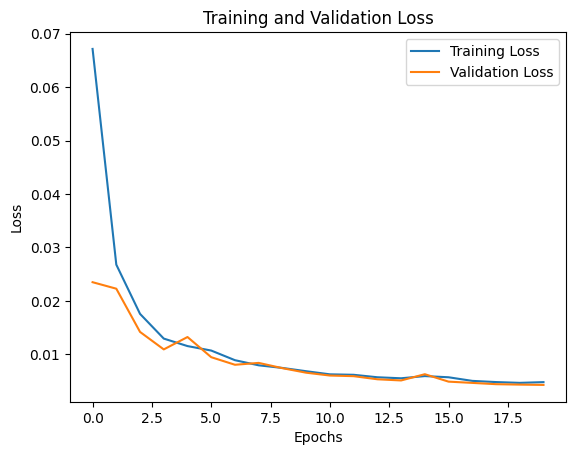

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step


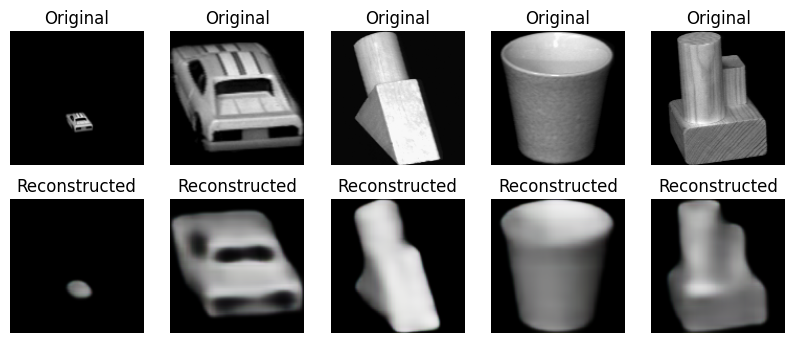

Mean Squared Error (MSE) on the test set: 0.004284488968551159


In [ ]:

# --- CNN Autoencoder Model ---
def build_cnn_autoencoder(input_shape=(128, 128, 3)):  
    # Encoder
    input_img = layers.Input(shape=input_shape)

    # First Convolutional Block
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Second Convolutional Block
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Third Convolutional Block
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Latent Space (Bottleneck Layer)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output Layer (Reconstructed image)
    decoded = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)  # Use 1 channel for grayscale images (if using grayscale)

    # Autoencoder model
    autoencoder = models.Model(input_img, decoded)

    return autoencoder

# Instantiate the model
autoencoder = build_cnn_autoencoder()

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary of the model architecture
autoencoder.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = autoencoder.fit(
    X_train, X_train,  
    epochs=20,
    batch_size=64,
    validation_data=(X_test, X_test),  
    callbacks=[early_stopping]  
)


autoencoder.save('cnn_autoencoder_model.h5')

# --- Loss Curve Visualization ---
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# --- Visualize Some Reconstructions ---
reconstructed_imgs = autoencoder.predict(X_test)

# Display original vs reconstructed images (5 examples)
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

# --- Calculate MSE on the Test Set ---
mse = np.mean(np.square(X_test - reconstructed_imgs), axis=(1, 2, 3))
print(f"Mean Squared Error (MSE) on the test set: {np.mean(mse)}")


## Interpreation for the Graph

The Graph is showing the training and validation loss over the epochs of training your CNN Autoencoder.

Training Loss (Blue Line): This shows how well the model is learning to reconstruct the input images. It should decrease over time as the model gets better.

Validation Loss (Orange Line): This shows how well the model performs on unseen data (the test set). It helps you see if the model is just memorizing the training data or if it’s generalizing well.


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - loss: 0.0041
Test Loss: 0.004284488968551159
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step


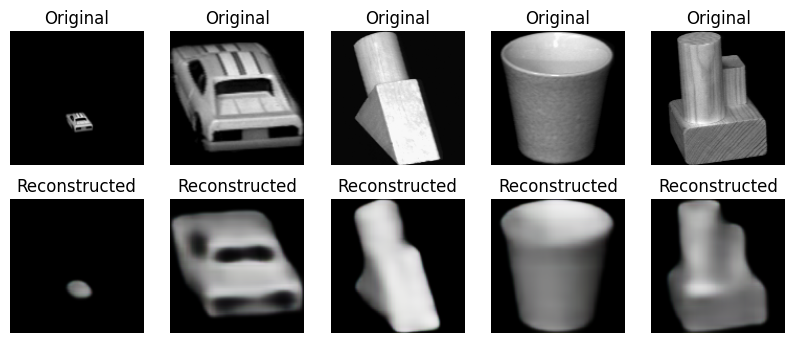

Mean Squared Error (MSE) on the test set: 0.004284488968551159


In [12]:
# --- Evaluate the Model ---
# Evaluate the model's performance on the test set
loss = autoencoder.evaluate(X_test, X_test, batch_size=64)
print(f"Test Loss: {loss}")

# --- Visualize Some Reconstructions ---
# Predict reconstructed images
reconstructed_imgs = autoencoder.predict(X_test)

# Display original vs reconstructed images (5 examples)
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

# --- Calculate MSE on the Test Set ---
# Calculate the MSE (Mean Squared Error) between the original and reconstructed images
mse = np.mean(np.square(X_test - reconstructed_imgs), axis=(1, 2, 3))
print(f"Mean Squared Error (MSE) on the test set: {np.mean(mse)}")


## Deliverables and Explanation:
### Architecture of the CNN Autoencoder:

Encoder: The encoder part reduces the input image's spatial dimensions using convolutional and max-pooling layers. The final latent representation is created after passing through four convolutional blocks.

Decoder: The decoder reconstructs the image using transposed convolutional layers (also known as deconvolutional layers) and upsampling. The output layer uses a sigmoid activation function to generate the image with three channels (RGB).

Model Summary: Use the autoencoder.summary() to print the architecture of the CNN Autoencoder, which will be a part of your report.

### Loss Curve During Training:

The training and validation loss curves are visualized after training, which helps in understanding how well the model is converging. The code for plotting the loss curve is included in the above code. It uses plt.plot() to display the loss for each epoch.
Original vs. Reconstructed Images:

The original and reconstructed images are displayed side by side for at least 5 samples from the test set. This will give an idea of how well the autoencoder is performing. The plt.imshow() function is used to display the images.

### Final test MSE value

In [13]:
print(f"Mean Squared Error (MSE) on the test set: {np.mean(mse)}")


Mean Squared Error (MSE) on the test set: 0.004284488968551159
